I applied the REINFORCE algorithm on Pendulum-v0 environment. I use a multilayer perceptron to approximate the policy.
    I tested different hyperparameters.

    Baseline model:
    - A hidden layer with 128 units
    - 5k steps to collect data for each gradient estimation
    - 15k episodes (~2M frames) as the training limit
    - Adam optimizer with lr=0.001
    - Average reward as the baseline
    - Discount rate is 0.97

In [1]:
using Seaborn, JLD, Pandas

INFO: Installing PyQt5 via Anaconda's /home/cano/anaconda2/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/cano/anaconda2:
#
pyqt                      4.11.4                   py27_4  


First, I tested the effect of the batch size to make a gradient estimation. While the batch size increases, we get better gradient estimation and more stable policy.

In [2]:
steps = nothing
rewards = nothing
batchsize = nothing
units = nothing
for i=[1,2,5,10]
    rs, ss = load(string("h128_s",i,"k_experiment.jld"), "rewards", "steps")
    if steps == nothing
        steps = ss
        rewards = rs
        batchsize = split(strip(string("batchsize#", i, "k ") ^ length(rs)))
        units = zeros(length(rs),)
    else
        append!(steps,ss)
        append!(rewards, rs)
        append!(batchsize, split(strip(string("batchsize#", i, "k ") ^ length(rs))))
        append!(units, zeros(length(rs)))
    end
end

df = DataFrame(Dict(:steps=>steps, :meanrewards=>rewards, :batchsize=>batchsize, :units=>units));

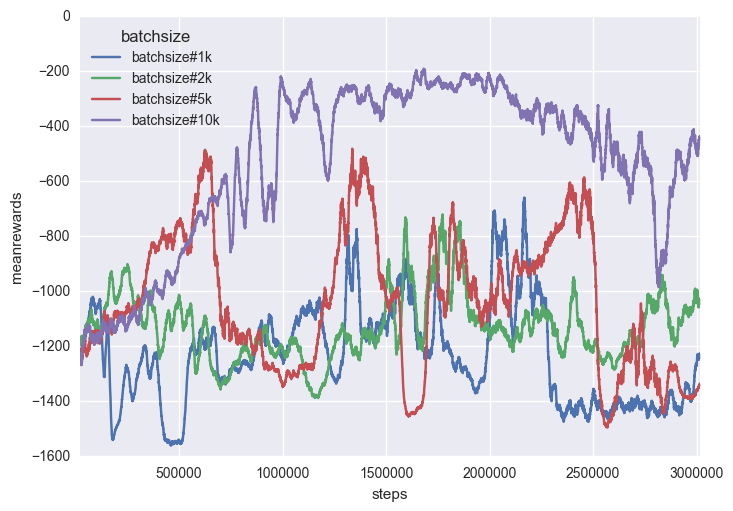

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ca872ad0>

In [3]:
tsplot(df; time=:steps, value=:meanrewards, condition=:batchsize, unit=:units)

The second hyperparameter I testes is the number of units in the hidden layer. The model with the hidden state of size 64 is more stable.

In [5]:
steps = nothing
rewards = nothing
hiddensize = nothing
units = nothing
for i=[32, 64, 128]
    rs, ss = load(string("h", i, "_s10k_experiment.jld"), "rewards", "steps")
    if steps == nothing
        steps = ss
        rewards = rs
        hiddensize = split(strip(string("hiddensize#", i, " ") ^ length(rs)))
        units = zeros(length(rs),)
    else
        append!(steps,ss)
        append!(rewards, rs)
        append!(hiddensize, split(strip(string("hiddensize#", i, " ") ^ length(rs))))
        append!(units, zeros(length(rs)))
    end
end

df = DataFrame(Dict(:steps=>steps, :meanrewards=>rewards, :hiddensize=>hiddensize, :units=>units));

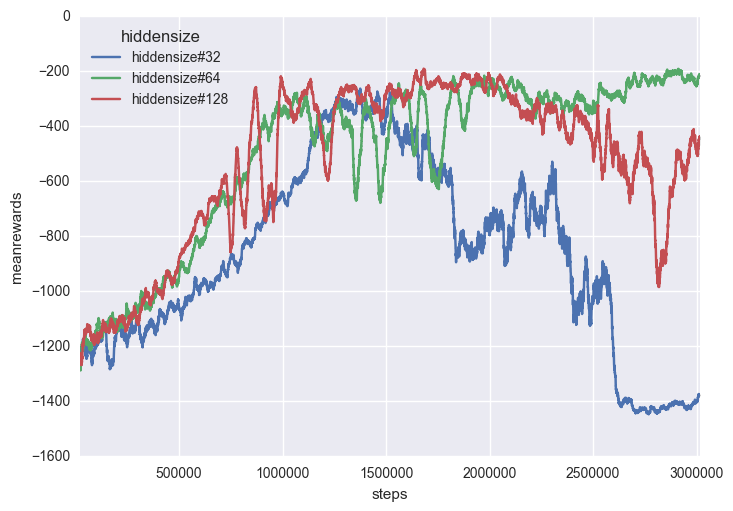

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fb2c27d2e10>

In [6]:
tsplot(df; time=:steps, value=:meanrewards, condition=:hiddensize, unit=:units)